In [1]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train, validate, test = p.split_data(p.prepare_data(a.acquire_data()),'churn')

File exists - reading CSV file


In [3]:
top_three = e.top_three_rel_columns(train, 'churn')

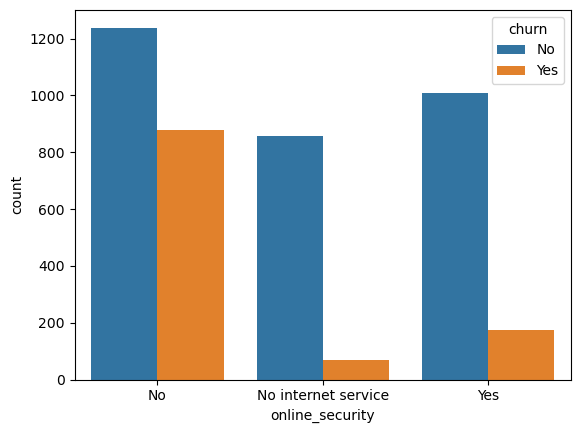

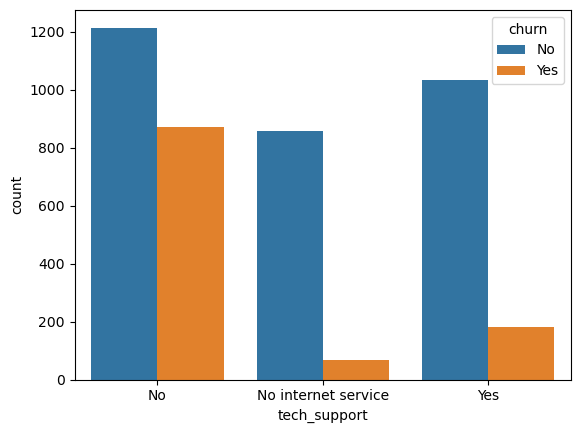

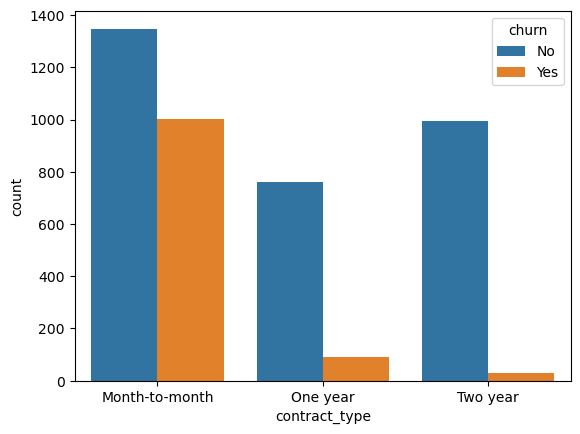

In [15]:
for col in top_three:
    sns.countplot(train,x=train[col].sort_values(),hue=train.churn)
    plt.show()